# Movie Review Classification using ANN

## Preprocessing the data 

### Getting data

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

In [2]:
word_index = imdb.get_word_index()
reverse_word_dict = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(reverse_word_dict.get(i-3, '?') for i in train_data[0])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Vectorising sequences

In [3]:
import numpy as np

#Vectorizer function
def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#Vectorizer in action
x_train = vectorize(train_data)
x_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Models

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Model 1

In [5]:
model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(10000, )))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Fit 1

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.5316 - acc: 0.7689 - val_loss: 0.3982 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.3207 - acc: 0.8999 - val_loss: 0.3158 - val_acc: 0.8814
Epoch 3/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.2307 - acc: 0.9259 - val_loss: 0.2816 - val_acc: 0.8927
Epoch 4/20
15000/15000 [==============================] - 1s 66us/sample - loss: 0.1836 - acc: 0.9406 - val_loss: 0.2780 - val_acc: 0.8912
Epoch 5/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.1484 - acc: 0.9533 - val_loss: 0.3104 - val_acc: 0.8783
Epoch 6/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.1220 - acc: 0.9644 - val_loss: 0.2910 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.1038 - acc: 0.9709 - val_loss: 0.

### Plot 1

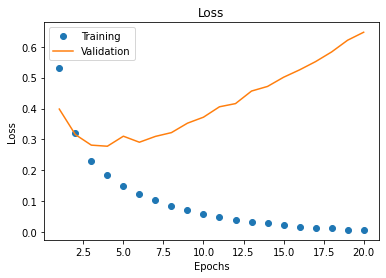

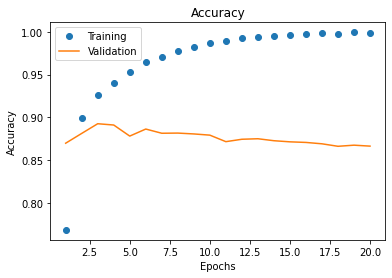

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(accuracy)+1)

plt.figure(1)
plt.title('Loss')
plt.plot(epochs, loss, 'o', label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.title('Accuracy')
plt.plot(epochs, accuracy, 'o', label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [8]:
model1.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 60us/sample - loss: 0.7064 - acc: 0.8516


[0.7063505449390411, 0.85156]

### Model with added regularization 

In [9]:
from tensorflow.keras import regularizers

model2 = Sequential()
model2.add(Dense(16, activation='relu', input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
history1 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.5549 - acc: 0.7941 - val_loss: 0.4364 - val_acc: 0.8615
Epoch 2/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.3601 - acc: 0.9011 - val_loss: 0.3571 - val_acc: 0.8850
Epoch 3/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.2918 - acc: 0.9187 - val_loss: 0.3495 - val_acc: 0.8813
Epoch 4/20
15000/15000 [==============================] - 1s 66us/sample - loss: 0.2551 - acc: 0.9337 - val_loss: 0.3413 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 1s 70us/sample - loss: 0.2347 - acc: 0.9386 - val_loss: 0.3578 - val_acc: 0.8794
Epoch 6/20
15000/15000 [==============================] - 1s 71us/sample - loss: 0.2144 - acc: 0.9508 - val_loss: 0.3597 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.2067 - acc: 0.9506 - val_loss: 0.

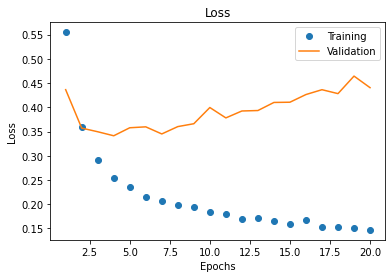

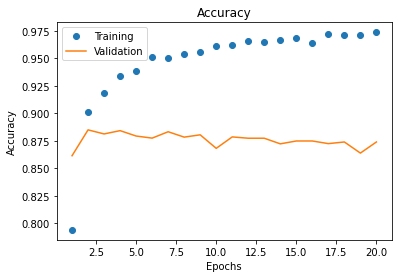

In [11]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
accuracy = history1.history['acc']
val_acc = history1.history['val_acc']
epochs = range(1, len(accuracy)+1)

plt.figure(3)
plt.title('Loss')
plt.plot(epochs, loss, 'o', label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(4)
plt.title('Accuracy')
plt.plot(epochs, accuracy, 'o', label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

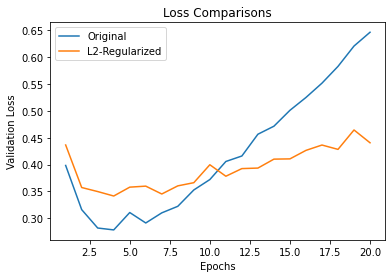

In [14]:
plt.figure(5)
val_loss1 = history1.history['val_loss']
plt.title('Loss Comparisons')
plt.plot(epochs, val_loss, label='Original')
plt.plot(epochs, val_loss1, label='L2-Regularized')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()